Exploratory Data Analysis and MetaData Generation

Data size

In [20]:
import pandas as pd

# Create a dictionary with column names and data
data = {'Artist': [],
        'Song_name': [],
        'Duration': [],
        'size':[],
        'loudness':[],
        'Tempo':[],
        }

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

Empty DataFrame
Columns: [Artist, Song_name, Duration, size, loudness, Tempo]
Index: []


In [33]:
import os

# Set the path of the artist folder
artist_folder = '/home/adham.ibrahim/music_Data_download/Artists'
# Create a dictionary with column names and data
data = {'Artist': [],
        'Song_name': [],
        'Duration': [],
        'size':[],
        'loudness':[],
        'Tempo':[],
        }

# Create a dataframe from the dictionary
df = pd.DataFrame(data)


# Initialize a variable to count the total number of songs
total_songs = 0

list_duration = []
list_artist = []
list_name = []
list_size = []
list_loudness = []
list_tempo = []
i =0

# Loop through the artist folders
for artist_name in os.listdir(artist_folder):
    # Get the path of the artist folder
    artist_path = os.path.join(artist_folder, artist_name)
    #print(artist_name)
    # Check if the path is a directory
    if os.path.isdir(artist_path):
        # Loop through the song files in the artist folder
        for song_file in os.listdir(artist_path):
            if i == 5:
                break
            i+=1
            # Check if the file is an audio file
            if song_file.endswith('.mp3') or song_file.endswith('.wav') or song_file.endswith('.flac'):
                # Increment the total song count
                audio_path = os.path.join(artist_path, song_file)
                print(audio_path)
                y, sr = librosa.load(audio_path)

                # Extract the duration in seconds
                duration = librosa.get_duration(y=y, sr=sr)
                list_duration.append(duration)
                #print("Duration:", duration, "seconds")
                
                # Extract the loudness
                rms = librosa.feature.rms(y=y)
                loudness = librosa.core.power_to_db(rms)
                list_loudness.append(loudness[0][0])
                #print("Loudness:", loudness[0][0], "dB")

                # Extract the tempo
                tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
                list_tempo.append(tempo)
                #print("Tempo:", tempo, "BPM")

                # Extract the file size
                file_size = os.path.getsize(audio_path)
                list_size.append(file_size)
                #print("File size:", file_size, "bytes")
                list_artist.append(artist_name)
                list_name.append(song_file)

                total_songs += 1

df['Artist']=list_artist

df['Song_name']=list_name
df['Duration']=list_duration
df['size']=list_size
df['loudness']=list_loudness
df['Tempo']=list_tempo

# Print the total number of songs
print("Total number of songs:", total_songs)

# save the dataframe to a file named 'my_dataframe.csv'
df.to_csv('songs_df.csv', index=False)

#df.to_hdf('songs_df.h5', key='df', mode='w')

/home/adham.ibrahim/music_Data_download/Artists/Mostafa_Amar/Alarab_Mostafa_Amar_Ensa.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


/home/adham.ibrahim/music_Data_download/Artists/Mostafa_Amar/Alarab_Moustafa-amr_Kalam-Einak.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


/home/adham.ibrahim/music_Data_download/Artists/Mostafa_Amar/Alarab_Mostafa_Amar_Eneky_Wahshane.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


/home/adham.ibrahim/music_Data_download/Artists/Mostafa_Amar/Alarab_Mostafa_Amar_Tal_Elail.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


/home/adham.ibrahim/music_Data_download/Artists/Mostafa_Amar/Alarab_Mostafa-Amar_Yekhrebet-3a2lak.mp3
Total number of songs: 5


In [168]:
import pandas as pd

df = pd.read_csv("songs_df.csv")

In [60]:
df.head()

,Artist,Song_name,Duration,size,loudness,Tempo
0,Mostafa_Amar,Alarab_Mostafa_Amar_Ensa.mp3,208.008027,641408,-83.808030,143.554688
1,Mostafa_Amar,Alarab_Moustafa-amr_Kalam-Einak.mp3,232.411429,3270963,-83.857520,129.199219
2,Mostafa_Amar,Alarab_Mostafa_Amar_Eneky_Wahshane.mp3,175.608027,544208,-82.749016,95.703125
3,Mostafa_Amar,Alarab_Mostafa_Amar_Tal_Elail.mp3,269.923265,4346576,-83.606810,66.256010
4,Mostafa_Amar,Alarab_Mostafa-Amar_Yekhrebet-3a2lak.mp3,228.384036,9152707,-83.716225,135.999178


In [61]:
print("Total Duration in Muinutes : ", round( df['Duration'].sum() /60 , 2))

file_size_mb = df['size'].sum() / (1024 * 1024 *1024)
print(f"The size of the audio files is {file_size_mb:.2f} GB.")



Total Duration in Muinutes :  9729.96
The size of the audio files is 13.66 GB.


In [74]:
df['size'] / (1024 * 1024 )

0       0.611694
1       3.119433
2       0.518997
3       4.145218
4       8.728702
          ...   
2181    9.511834
2182    6.685471
2183    0.751115
2184    4.219867
2185    4.903461
Name: size, Length: 2186, dtype: float64

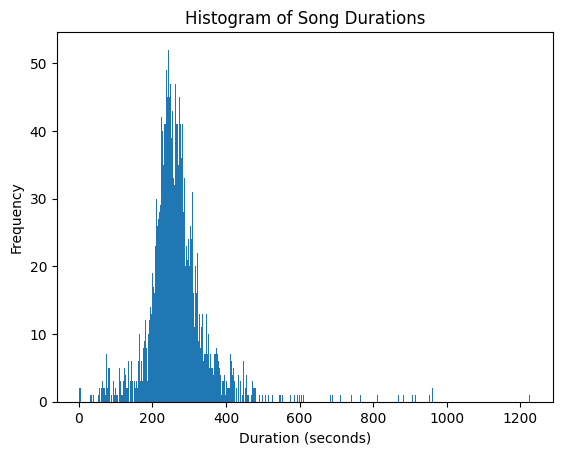

In [80]:
x = df['Duration'].plot.hist(bins = 500)

# set the x- and y-axis labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Durations')

# display the plot
plt.show()

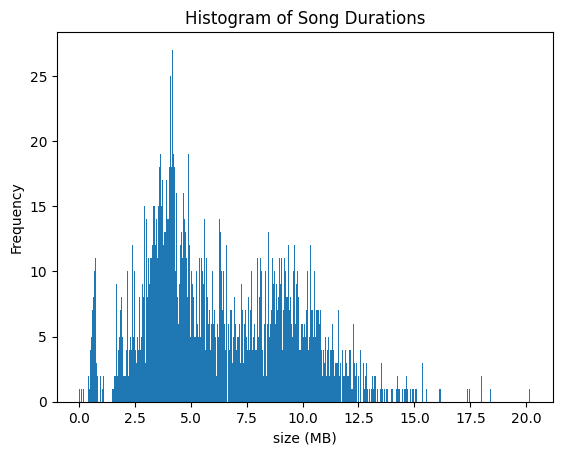

In [81]:
size_Mb = df['size'] / (1024 * 1024 )

x = size_Mb.plot.hist(bins = 500)

# set the x- and y-axis labels and title
plt.xlabel('size (MB)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Durations')

# display the plot
plt.show()

Tempo in audio refers to the speed or pace of a musical composition. It is usually measured in beats per minute (BPM),
which represents the number of beats or pulses in one minute of music.
The tempo is a fundamental characteristic of a musical piece, 
and it can have a significant impact on the overall feel, mood, 
and energy of the music. A fast tempo, for example, can create a sense of excitement, urgency, or intensity, 
while a slow tempo can evoke a feeling of relaxation, calmness, or sadness.


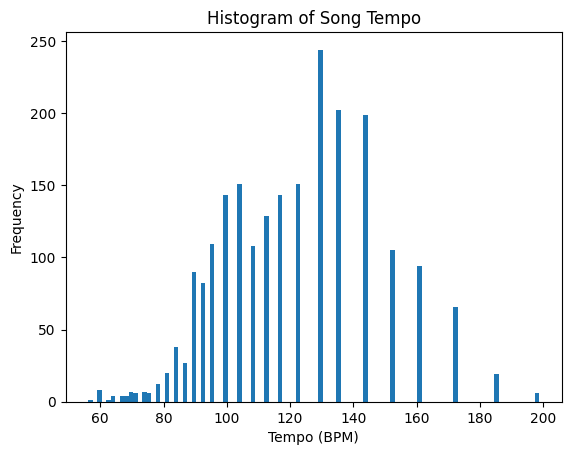

In [97]:

x = df['Tempo'].plot.hist(bins = 100)

# set the x- and y-axis labels and title
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Tempo')

# display the plot
plt.show()

controlling the loudness of a recording or mix is an important consideration. The loudness of a recording can affect its overall impact and emotional impact on the listener, and it can also affect how well it translates to different playback systems and environments. Techniques such as dynamic range compression and equalization can be used to control the loudness and balance of different elements in a mix.



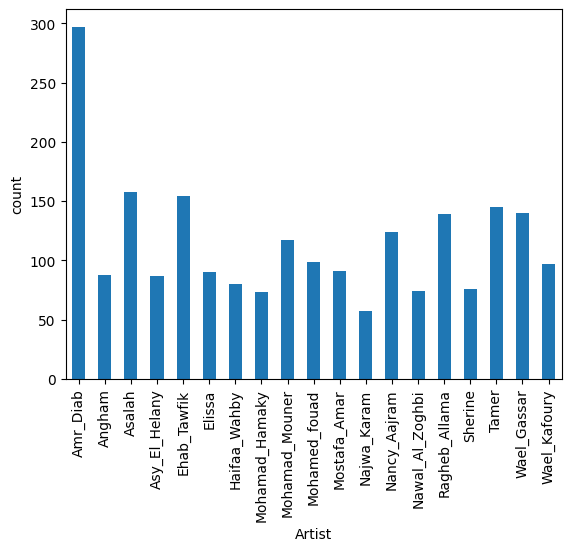

In [150]:
grouped_df = df.groupby('Artist').agg({'Artist': ['count']})
grouped_df['Artist']['count']


# Create bar plot
ax = grouped_df['Artist']['count'].plot(x='Artist', y='Tempo', kind='bar', legend=False)
ax.set_xlabel('Artist')
ax.set_ylabel('count')
plt.show()

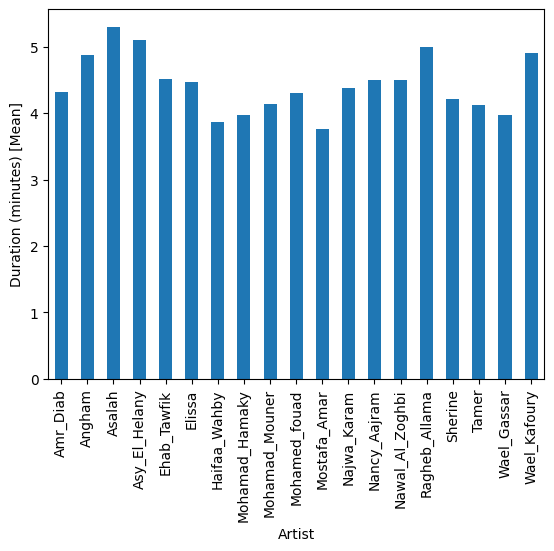

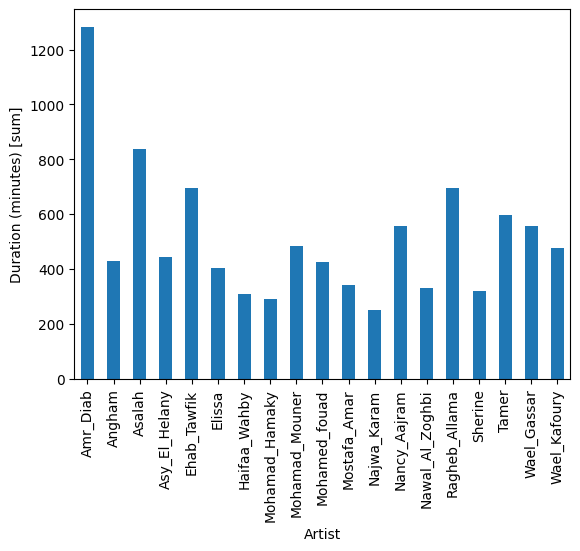

In [132]:
# Group by artist and sum duration
grouped = df.groupby('Artist')['Duration'].mean().reset_index()
grouped['Duration'] = grouped['Duration'] / 60

# Create bar plot
ax = grouped.plot(x='Artist', y='Duration', kind='bar', legend=False)
ax.set_xlabel('Artist')
ax.set_ylabel('Duration (minutes) [Mean]')
plt.show()
# Group by artist and sum duration
grouped2 = df.groupby('Artist')['Duration'].sum().reset_index()
grouped2['Duration'] = grouped2['Duration'] / 60

# Create bar plot
ax1 = grouped2.plot(x='Artist', y='Duration', kind='bar', legend=False)
ax1.set_xlabel('Artist')
ax1.set_ylabel('Duration (minutes) [sum]')
plt.show()

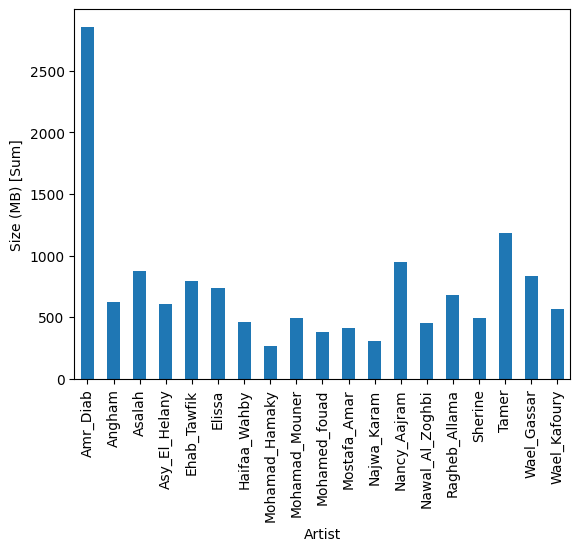

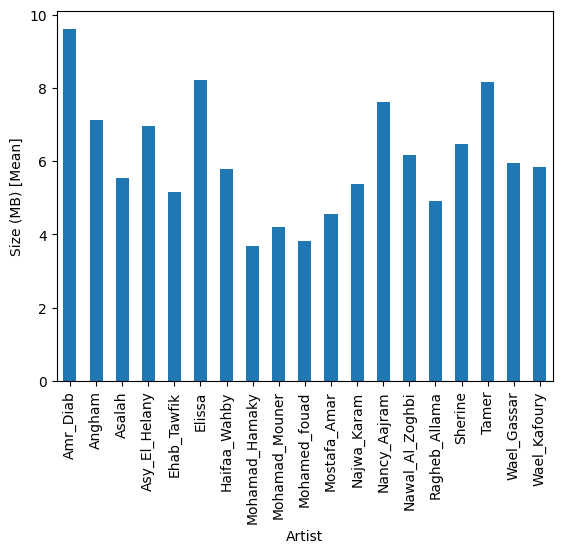

In [133]:
# Group by artist and sum duration
Artist_size = df.groupby('Artist')['size'].sum().reset_index()
Artist_size['size'] = Artist_size['size'] / (1024*1024)

# Create bar plot
ax = Artist_size.plot(x='Artist', y='size', kind='bar', legend=False)
ax.set_xlabel('Artist')
ax.set_ylabel('Size (MB) [Sum]')
plt.show()

# Group by artist and sum duration
Artist_size2 = df.groupby('Artist')['size'].mean().reset_index()
Artist_size2['size'] = Artist_size2['size'] / (1024*1024)

# Create bar plot
ax = Artist_size2.plot(x='Artist', y='size', kind='bar', legend=False)
ax.set_xlabel('Artist')
ax.set_ylabel('Size (MB) [Mean]')
plt.show()

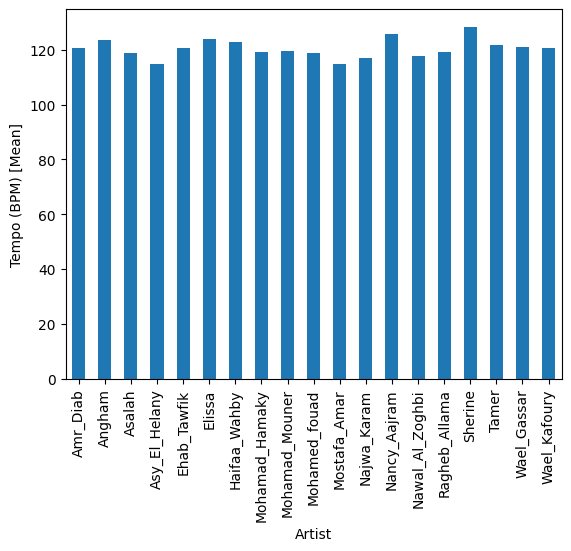

In [128]:
# Group by artist and sum duration
Artist_size = df.groupby('Artist')['Tempo'].mean().reset_index()

# Create bar plot
ax = Artist_size.plot(x='Artist', y='Tempo', kind='bar', legend=False)
ax.set_xlabel('Artist')
ax.set_ylabel('Tempo (BPM) [Mean]')
plt.show()

In [153]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [167]:
df

,Artist,Tempo
0,A,120
1,A,140
2,B,130
3,B,150
4,C,135
5,C,145


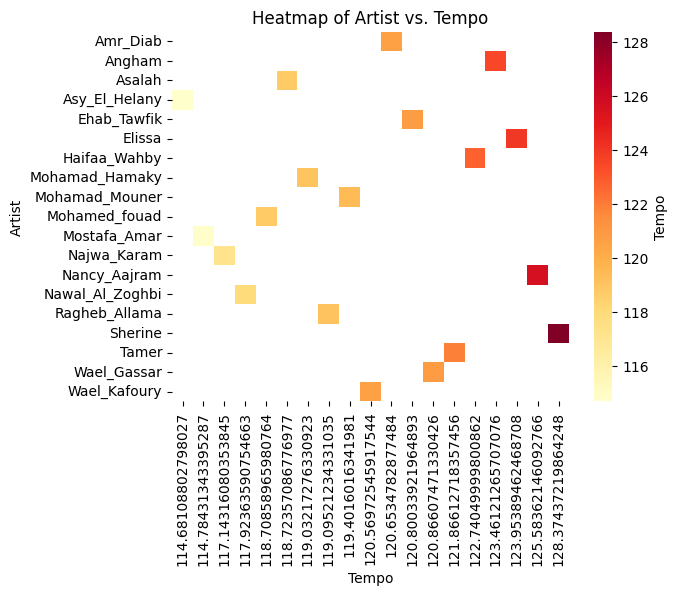

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by artist and tempo and calculate the mean tempo for each group
grouped_df = df.groupby('Artist')['Tempo'].mean().reset_index()

# Pivot the data to create a matrix of artist vs. tempo
pivoted_df = grouped_df.pivot(index='Artist', columns='Tempo', values='Tempo')

# Create the heatmap
sns.heatmap(pivoted_df, cmap='YlOrRd', annot=False, fmt='g', cbar_kws={'label': 'Tempo'})
plt.title('Heatmap of Artist vs. Tempo')
plt.xlabel('Tempo')
plt.ylabel('Artist')
plt.show()

/home/adham.ibrahim/.conda/envs/musika_2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


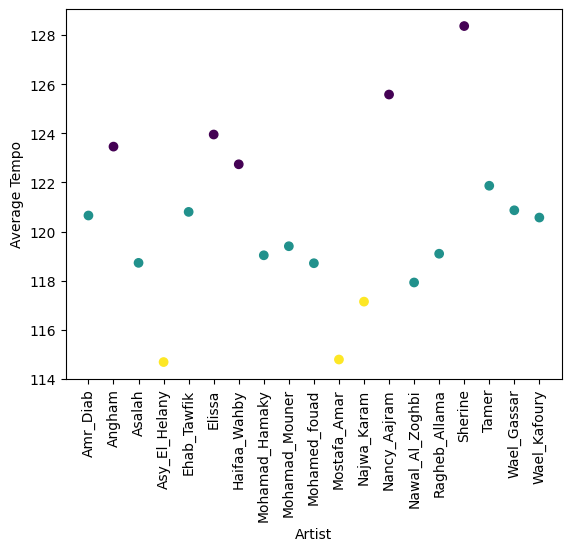

In [191]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calculate the average tempo for each artist
tempo_df = df.groupby('Artist')['Tempo'].mean().reset_index()

# Scale the tempo data
tempo_scaled = (tempo_df[['Tempo']] - tempo_df[['Tempo']].mean()) / tempo_df[['Tempo']].std()

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(tempo_scaled)

# Add cluster labels to DataFrame
tempo_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(tempo_df['Artist'], tempo_df['Tempo'], c=tempo_df['Cluster'])
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Average Tempo')
plt.show()


In [195]:
tempo_df

,Artist,Tempo,Cluster
0,Amr_Diab,120.653478,1
1,Angham,123.461213,0
2,Asalah,118.723571,1
3,Asy_El_Helany,114.681088,2
4,Ehab_Tawfik,120.800339,1
5,Elissa,123.953895,0
6,Haifaa_Wahby,122.740500,0
7,Mohamad_Hamaky,119.032173,1
8,Mohamad_Mouner,119.401602,1
9,Mohamed_fouad,118.708590,1


In [197]:
# Group the DataFrame by cluster
grouped_df = tempo_df.groupby('Cluster')

# Create a new DataFrame with a list of artists in each cluster
artists_per_cluster = grouped_df['Artist'].apply(list).reset_index(name='Artists')

# Print the DataFrame



   Cluster                                            Artists
0        0  [Angham, Elissa, Haifaa_Wahby, Nancy_Aajram, S...
1        1  [Amr_Diab, Asalah, Ehab_Tawfik, Mohamad_Hamaky...
2        2         [Asy_El_Helany, Mostafa_Amar, Najwa_Karam]


In [210]:
print("Cluster 0 ",artists_per_cluster['Artists'][0])
print("Cluster 1 ",artists_per_cluster['Artists'][1])
print("Cluster 2 ",artists_per_cluster['Artists'][2])

Cluster 0  ['Angham', 'Elissa', 'Haifaa_Wahby', 'Nancy_Aajram', 'Sherine']
Cluster 1  ['Amr_Diab', 'Asalah', 'Ehab_Tawfik', 'Mohamad_Hamaky', 'Mohamad_Mouner', 'Mohamed_fouad', 'Nawal_Al_Zoghbi', 'Ragheb_Allama', 'Tamer', 'Wael_Gassar', 'Wael_Kafoury']
Cluster 2  ['Asy_El_Helany', 'Mostafa_Amar', 'Najwa_Karam']
